# 1. Importando os dados:

Abaixo, usamos pandas para importar os dados, mas logo transformamos o DataFrame em uma lista, para tentar nos adequar ao máximo ao conteúdo já ministrado.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


dados = pd.read_json('brasileirao-2019.json')


campeonato = []

for i in dados.columns:
  campeonato.append(list(dados[i]))

# 2. Funções usadas:
Abaixo, criamos as funções que irão ser usadas ao longo do projeto:

In [2]:
def tecnicos(campeonato: list) -> list:
  """retorna a lista de técnicos que participaram do campeonato"""
  tec = sorted(
      list(
          set(
              [
                  tecnico
                  for rodada in campeonato
                  for partida in rodada
                  for tecnico in partida['coach'].values()
              ]
            )
          )
      )
  return tec



def times(campeonato: list) -> list:
  """retorna uma lista com os times que disputaram o campeonato em ordem alfabética"""
  t = sorted(
      list(
          set(
              [
                  time
                  for rodada in campeonato
                  for partida in rodada
                  for time in partida['clubs'].values()
              ]
            )
          )
      )
  return t



def times_por_tecnico(tecnico: str, campeonato: list) -> list:
  """Retorna uma lista com os times pelos quais o técnico atuou durante o campeonato"""
  return list(set([
    partida['clubs'][chave]
    for rodada in campeonato
    for partida in rodada
    for chave in ['home', 'away']
    if partida['coach'][chave] == tecnico
  ]))



def partidas_pelo_time(tecnico: str, time: str, campeonato: list) -> int:
    """recebe um técnico, um time e um campeonato,
    e retorna a quantidade de partidas disputadas pelo técnico no time"""
    return [
    partida['clubs'][chave]
    for rodada in campeonato
    for partida in rodada
    for chave in ['home', 'away']
    if (partida['coach'][chave] == tecnico
        and partida['clubs'][chave] == time)
  ].count(time)



def chave_tecnico(tecnico: str, partida: dict) -> str:
  """Recebe um tecnico e uma partida, e retorna a chave
  que indica se o tecnico jogou em casa ou fora de casa"""
  if tecnico not in partida['coach'].values():
    return ""
  return [ch for ch in partida['coach'].keys() if partida['coach'][ch] == tecnico][0]



def chave_time(time: str, partida: dict) -> str:
  """Recebe um time e uma partida, e retorna a chave
  que indica se o time jogou em casa ou fora de casa"""
  if time not in partida['clubs'].values():
    return ""
  return [ch for ch in partida['clubs'].keys() if partida['clubs'][ch] == time][0]



def tecnico_de(time: str, partida: dict) -> str:
  """Retorna o ténico do time na partida"""
  return "" if time not in partida['clubs'].values() else partida['coach'][chave_time(time, partida)]



def time_de(tecnico: str, partida: dict) -> str:
    """retorna o time treinado por um tecnico em uma partida"""
    return "" if tecnico not in partida['coach'].values() else partida['clubs'][chave_tecnico(tecnico, partida)]



def vencedor(partida: dict) -> str:
  """recebe uma partida e retorna o time vencedor"""
  if partida['goals']['home'] == partida['goals']['away']:
    return "empate"
  else:
    home = int(partida['goals']['home'])
    away = int(partida['goals']['away'])
    return partida['clubs']['home'] if home > away else partida['clubs']['away']



def pontos(time: str, campeonato: list) -> int:
  """retorna a quantidade de pontos de um time em um campeonato"""
  pontos = 0
  partidas = [
      partida
      for rodada in campeonato
      for partida in rodada
      if time in partida['clubs'].values()
    ]
  for partida in partidas:
    if vencedor(partida) == time:
      pontos += 3
    elif vencedor(partida) == 'empate':
      pontos += 1
  return pontos



def pontos_tecnico(tecnico: str, time: str, campeonato: list) -> int:
    """Retorna a quantidade de pontos que um técnico conseguiu para um dado time em um campeonato"""
    pontos = 0
    for rodada in campeonato:
        for partida in rodada:
            if time in partida['clubs'].values() and tecnico_de(time, partida) == tecnico:
                if vencedor(partida) == time:
                    pontos += 3
                elif vencedor(partida) == 'empate':
                    pontos += 1
    return pontos



def pontos_por_partida(tecnico: str, time: str, campeonato: list) -> float:
    """recebe um técnico, um time, e um capeonato, e retorna
    a quantidade de pontos por partida que este técnico fez pelo time"""
    return pontos_tecnico(tecnico, time, campeonato)/partidas_pelo_time(tecnico,time,campeonato)



def tecnico_mais_longevo(time: str, campeonato: list) -> str:
    """recebe um time e um campeonato, e retorna o tecnico mais longevo pelo time"""
    treinadores = [t for t in tecnicos(campeonato) if time in times_por_tecnico(t, campeonato)]
    maximo = 0
    t = ""
    for tecnico in treinadores:
        if partidas_pelo_time(tecnico, time, campeonato) > maximo:
            maximo = partidas_pelo_time(tecnico, time, campeonato)
            t = tecnico
    return t
    

# 3. Pontos por Partida. 

Para tentar mensurar a eficiência de um técnico em um time, vamos calcular a razão entre a quantidade de pontos que o time obteve sob o comando do técnico e a quantidade de partidas disputadas pelo time sob o comando do mesmo técnico durante o campeonato.

Abaixo, temos uma relação de todos os técnicos que participaram do campeonato e, para cada um deles, os times em que atuaram, quantidade de pontos que conseguiram para o time, e a quantidade de pontos por partida que atingiram:

In [3]:
for tecnico in tecnicos(campeonato):
    print(tecnico+":")
    for time in times_por_tecnico(tecnico, campeonato):
        print(f" -> {time}:")
        print("    - Partidas disputadas:     ", partidas_pelo_time(tecnico, time, campeonato))
        print("    - Total de pontos obtidos: ", pontos_tecnico(tecnico, time, campeonato))        
        print("    - Pontos por partida:      ", pontos_por_partida(tecnico, time,campeonato))
        print()
    print()

A. Batista:
 -> Ceará SC:
    - Partidas disputadas:      13
    - Total de pontos obtidos:  14
    - Pontos por partida:       1.0769230769230769

 -> Cruzeiro:
    - Partidas disputadas:      3
    - Total de pontos obtidos:  0
    - Pontos por partida:       0.0


A. Fucks:
 -> Ceará SC:
    - Partidas disputadas:      3
    - Total de pontos obtidos:  2
    - Pontos por partida:       0.6666666666666666

 -> CSA:
    - Partidas disputadas:      26
    - Total de pontos obtidos:  26
    - Pontos por partida:       1.0


A. Lopes dos Santos:
 -> Palmeiras:
    - Partidas disputadas:      2
    - Total de pontos obtidos:  6
    - Pontos por partida:       3.0


A. Stival:
 -> São Paulo:
    - Partidas disputadas:      21
    - Total de pontos obtidos:  35
    - Pontos por partida:       1.6666666666666667


A. Valentim do Carmo Neto:
 -> Avaí:
    - Partidas disputadas:      15
    - Total de pontos obtidos:  13
    - Pontos por partida:       0.8666666666666667

 -> Botafogo:
    - P

# 4. Seleção dos dados mais relevantes

Há muitos técnicos que não tiveram tanta participação no campeonato. Alguns, por exemplo, participaram de uma única partida em um único time.

O fato é que nem todos os dados que temos são relevantes para nossa análise. Queremos saber se há alguma relação entre o tempo (em rodadas) que um técnico passou em um time e o desempenho do time em um campeonato. Alguns dados além de não serem relevantes, poluem nossa análise, dificultando uma visão mais clara da situação.

Com isso em mente, vamos considerar, para cada time, apenas o técnico mais longevo no time, e vamos montar uma lista de tuplas. 

Cada tupla será composta de:
- Um time;
- O técnico mais longevo no time durante o campeonato;
- Quantidade de Partidas do técnico pelo time;
- Pontos por partida do técnico no time;
- Quantidade de pontos do time no campeonato.

A lista de tuplas será então ordenada pelo total de partidas, ou seja, a longevidade do técnico no time.

In [4]:
times_tecnicos_mais_longevos = []
for time in times(campeonato):
    tecnico = tecnico_mais_longevo(time, campeonato)
    times_tecnicos_mais_longevos.append((time,
                                         tecnico,
                                         partidas_pelo_time(tecnico, time, campeonato),
                                         pontos_por_partida(tecnico, time, campeonato),
                                         pontos(time, campeonato)
                                        ))

times_tecnicos_mais_longevos = sorted(times_tecnicos_mais_longevos, key=lambda x: x[2])


# 5. Gráficos:

## 5.1 Longevidade x Pontuação:
Abaixo, vemos um gráfico onde, no eixo das abscissas, temos a quantidade de partidas que um técnico disputou por um time, e no eixo das ordenadas, a quantidade de pontos que o time atingiu ao final do campeonato.

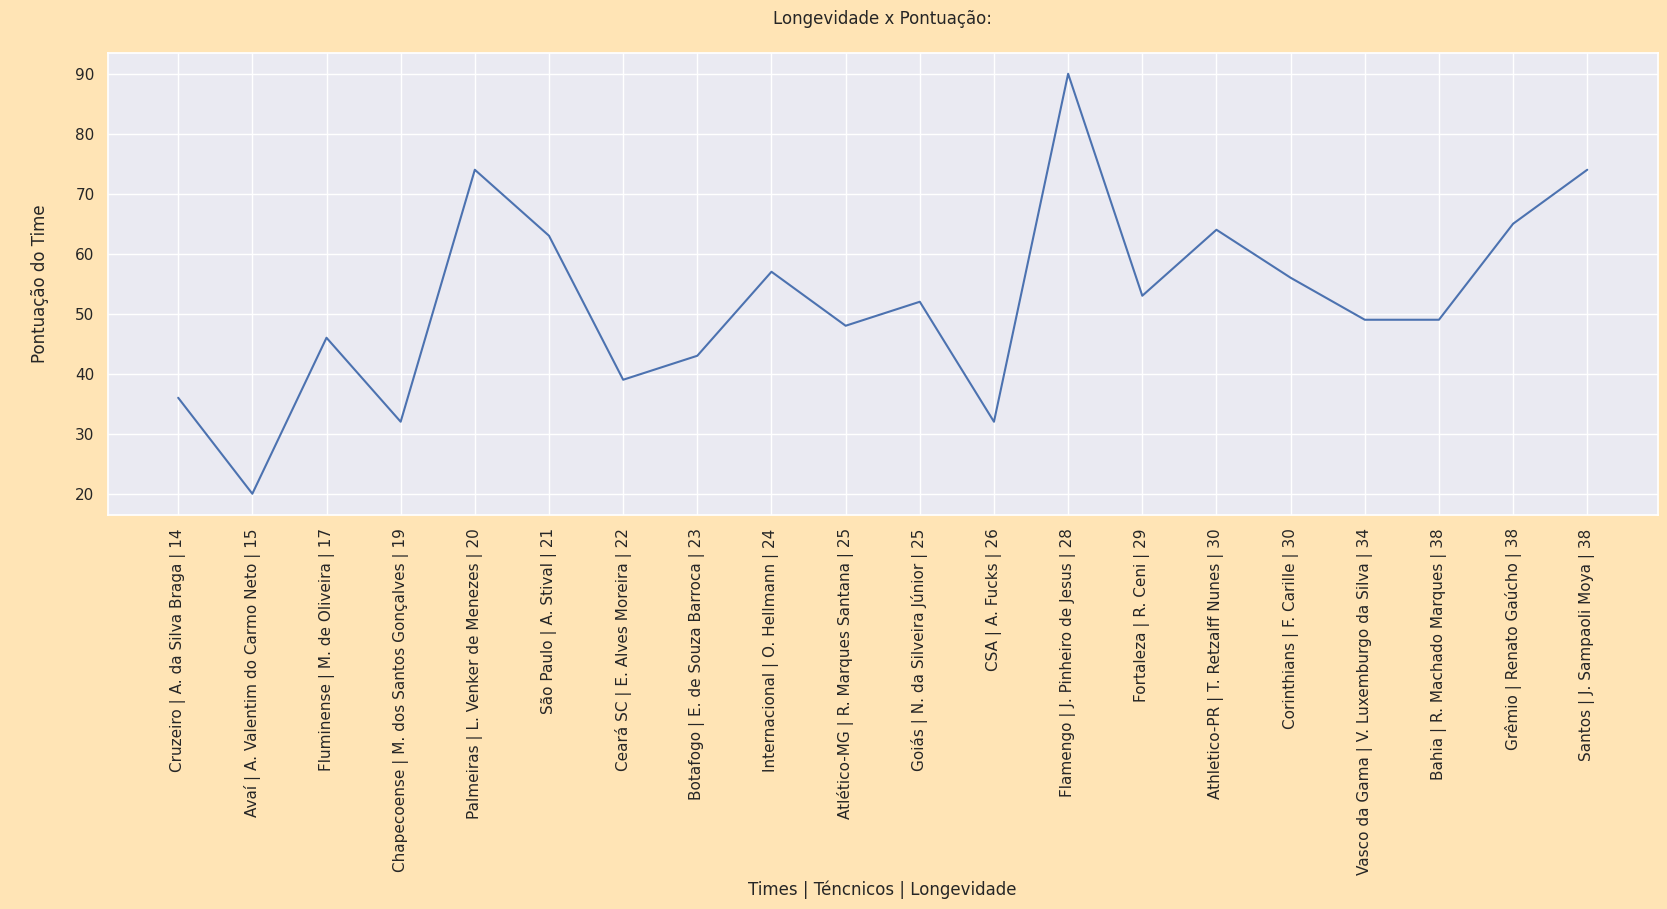

In [5]:
x = [f"{item[0]} | {item[1]} | {item[2]}" for item in times_tecnicos_mais_longevos]
y = [d[4] for d in times_tecnicos_mais_longevos]

fig = plt.figure(figsize=(20, 6),facecolor='moccasin')

sns.lineplot(x=x, y=y)
plt.title("Longevidade x Pontuação:\n")
plt.xticks(rotation=90)  
plt.xlabel('Times | Téncnicos | Longevidade')
plt.ylabel('\nPontuação do Time\n')
plt.show()

## 5.2 Longevidade x Pontos Por Partida:
Abaixo, vemos um gráfico onde, no eixo das abscissas, temos a quantidade de partidas que um técnico disputou por um time, e no eixo das ordenadas, a quantidade de pontos por partida que o técnico mais longevo obteve pelo time durante o campeonato.

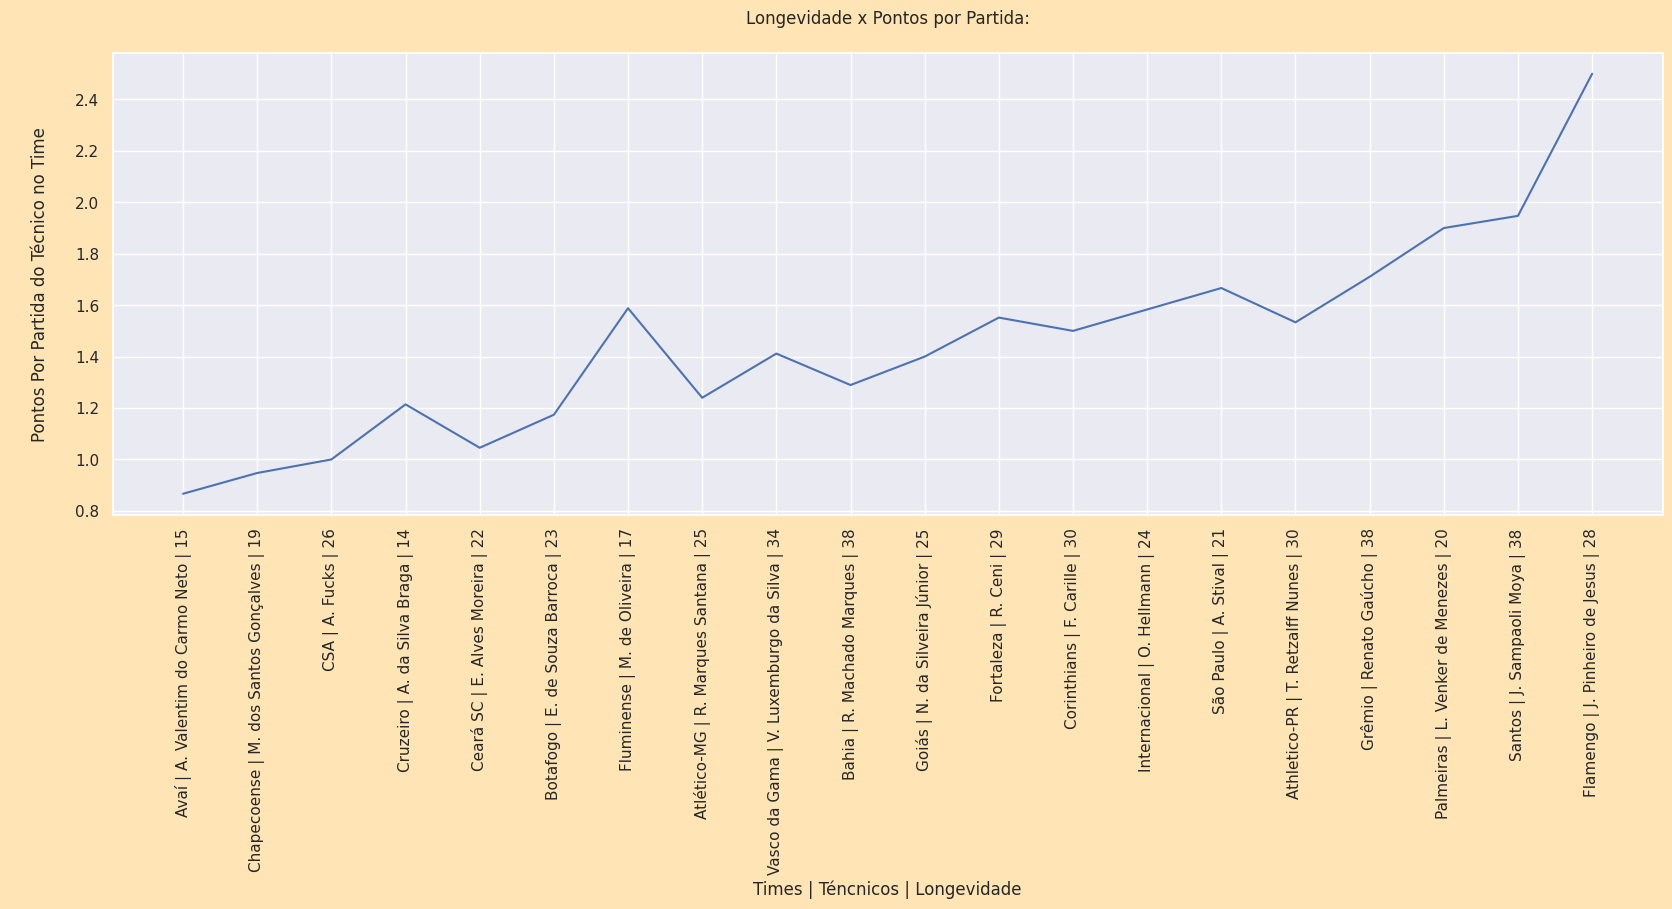

In [9]:
x = [f"{item[0]} | {item[1]} | {item[2]}" for item in times_tecnicos_mais_longevos]
y = [d[3] for d in times_tecnicos_mais_longevos]

fig = plt.figure(figsize=(20, 6),facecolor='moccasin')

sns.lineplot(x=x, y=y)
plt.title("Longevidade x Pontos por Partida:\n")
plt.xticks(rotation=90)  
plt.xlabel('Times | Téncnicos | Longevidade')
plt.ylabel('\nPontos Por Partida do Técnico no Time\n')
plt.show()

# 5.3 Pontuação x Pontos Por Partida:



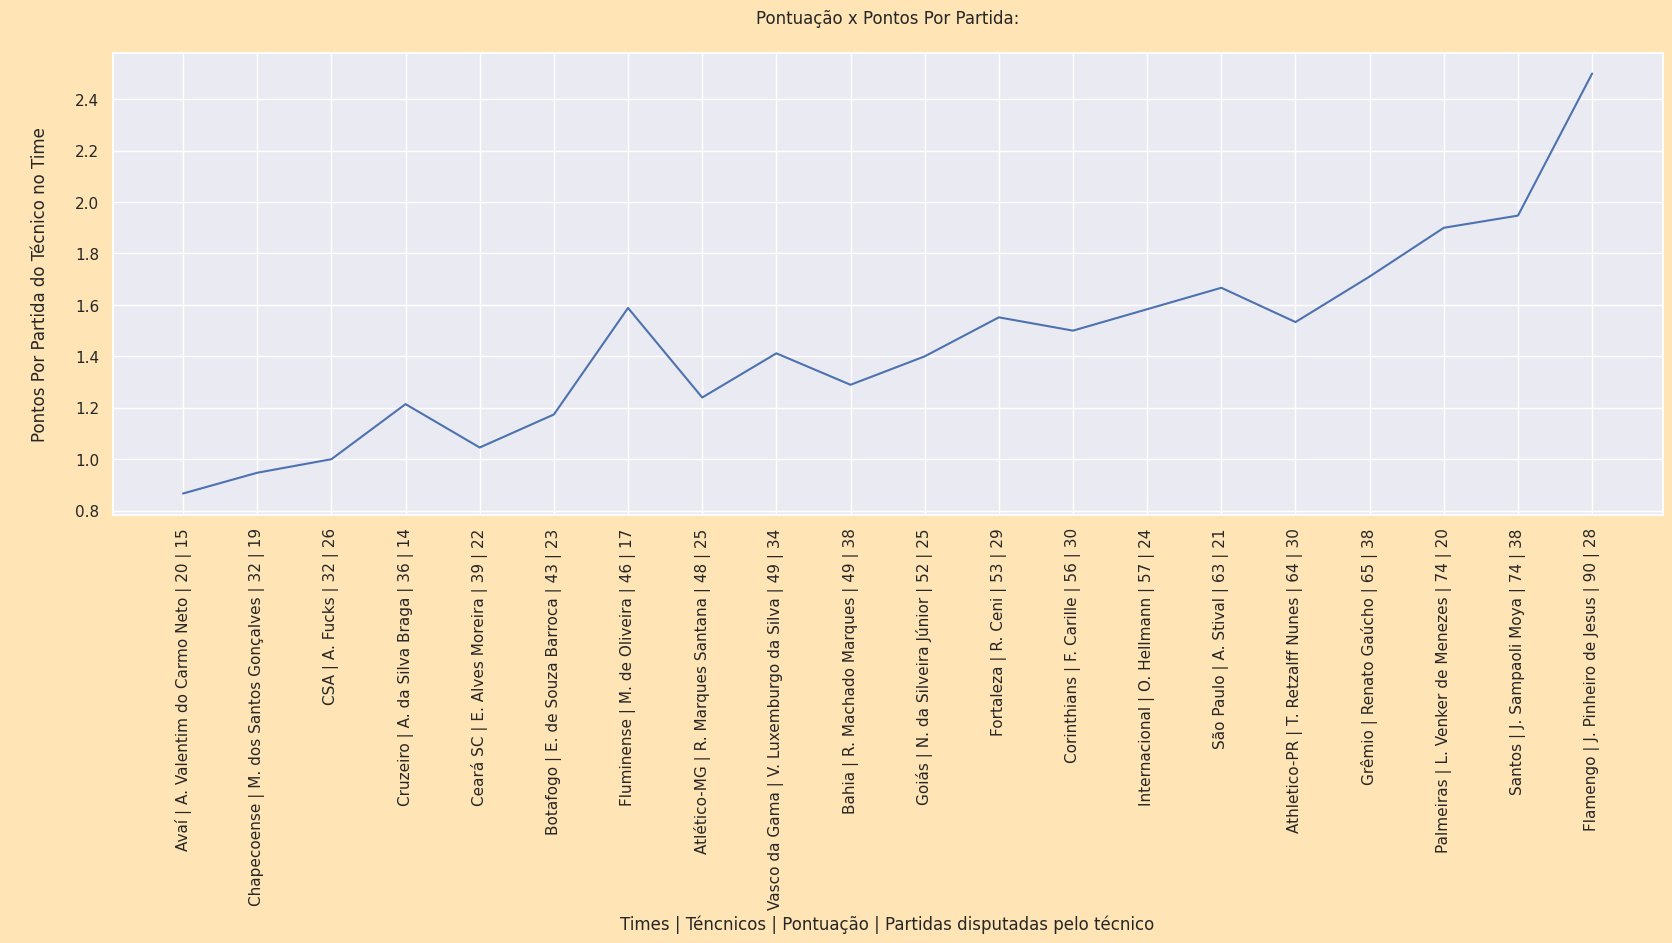

In [8]:
times_tecnicos_mais_longevos = sorted(times_tecnicos_mais_longevos, key=lambda x: x[4])

x = [f"{item[0]} | {item[1]} | {item[4]} | {item[2]}" for item in times_tecnicos_mais_longevos]
y = [d[3] for d in times_tecnicos_mais_longevos]

fig = plt.figure(figsize=(20, 6),facecolor='moccasin')

sns.lineplot(x=x, y=y)
plt.title("Pontuação x Pontos Por Partida:\n")
plt.xticks(rotation=90)  
plt.xlabel('Times | Téncnicos | Pontuação | Partidas disputadas pelo técnico')
plt.ylabel('\nPontos Por Partida do Técnico no Time\n')
plt.show()